<a href="https://colab.research.google.com/github/Rak18936/Rakshaya/blob/main/credictcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing file**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**data preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Copy original dataframe
data = df.copy()

# Normalize the 'Amount' column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Drop the 'Time' column
data.drop(['Time'], axis=1, inplace=True)

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']


In [ ]:
from sklearn.model_selection import train_test_split

# 70-30 stratified split to preserve class ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Report:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report:
[[85280    15]
 [   57    91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.61      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Report:
[[85290     5]
 [   35   113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



** Anomaly Detection with Isolation Forest**

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.001, random_state=42)
iso.fit(X_train)

# Predict: -1 = anomaly (fraud), 1 = normal
y_pred_iso = iso.predict(X_test)
y_pred_iso = [1 if i == -1 else 0 for i in y_pred_iso]

print("Isolation Forest Report:")
print(confusion_matrix(y_test, y_pred_iso))
print(classification_report(y_test, y_pred_iso))


Isolation Forest Report:
[[85242    53]
 [  115    33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.38      0.22      0.28       148

    accuracy                           1.00     85443
   macro avg       0.69      0.61      0.64     85443
weighted avg       1.00      1.00      1.00     85443



**Real-Time Fraud Simulation**

In [ ]:
import time
import numpy as np

print("Real-time Transaction Scanning (Simulated):")
for i in range(0, len(X_test), 1000):  # batch of 1000
    batch = X_test.iloc[i:i+1000]
    pred = rf.predict(batch)
    print(f"Batch {i//1000 + 1}: {np.sum(pred)} frauds detected")
    time.sleep(1)  # simulate delay


Real-time Transaction Scanning (Simulated):
Batch 1: 3 frauds detected
Batch 2: 1 frauds detected
Batch 3: 2 frauds detected
Batch 4: 0 frauds detected
Batch 5: 0 frauds detected
Batch 6: 3 frauds detected
Batch 7: 1 frauds detected
Batch 8: 3 frauds detected
Batch 9: 0 frauds detected
Batch 10: 1 frauds detected
Batch 11: 2 frauds detected
Batch 12: 2 frauds detected
Batch 13: 0 frauds detected
Batch 14: 0 frauds detected
Batch 15: 1 frauds detected
Batch 16: 2 frauds detected
Batch 17: 0 frauds detected
Batch 18: 1 frauds detected
Batch 19: 0 frauds detected
Batch 20: 3 frauds detected
Batch 21: 2 frauds detected
Batch 22: 1 frauds detected
Batch 23: 2 frauds detected
Batch 24: 3 frauds detected
Batch 25: 2 frauds detected
Batch 26: 1 frauds detected
Batch 27: 0 frauds detected
Batch 28: 2 frauds detected
Batch 29: 1 frauds detected
Batch 30: 2 frauds detected
Batch 31: 0 frauds detected
Batch 32: 2 frauds detected
Batch 33: 2 frauds detected
Batch 34: 3 frauds detected
Batch 35: 3 f

**Scalability with Parallel Prediction**

In [ ]:
from joblib import Parallel, delayed

def predict_batch(batch):
    return rf.predict(batch)

batches = np.array_split(X_test, 10)
results = Parallel(n_jobs=4)(delayed(predict_batch)(b) for b in batches)

total_frauds = sum(np.sum(r) for r in results)
print(f"Total frauds detected in parallel: {total_frauds}")


Total frauds detected in parallel: 118


C**onfusion Matrix Heatmap**

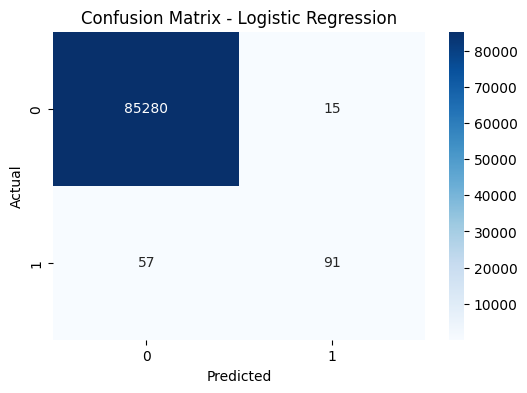

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
